<a href="https://colab.research.google.com/github/changsin/TDD/blob/main/tdd_python/notebooks/SOLID_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np

result1 = np.array([[0.81   , 0.043   , 0.677],
                    [0.72   , 0.063   , 0.333],
                    [0.67   , 0.062   , 1.   ],
                    [0.77   , 0.051   , 0.765],
                    [0.88   , 0.045   , 0.462]])

result2 = np.array([[0.459, 0.051, 0.71 ],
                    [0.909, 0.049, 0.933],
                    [0.   , 0.059, 0.833],
                    [0.889, 0.055, 0.882],
                    [0.769, 0.053, 0.692]])



In [15]:
import matplotlib.pyplot as plt

def plot_stats(stats, types, titles):
  x_bar = np.arange(stats[0].shape[0])
  bar_width = .35

  fig = plt.figure(figsize=(20,40))

  for i, stat in zip(range(len(stats)), stats):
    ax = fig.add_subplot(10, 4, i+1)
    # plt.axis('off')

    for t in types:
      if "mAP" == t:
        rects1 = ax.bar(x_bar - bar_width/3, stat[:, 0], label="mAP")
      if "std" == t:
        rects2 = ax.bar(x_bar, stat[:, 1], label="std")
      if "accuracy" == t:
        rects3 = ax.bar(x_bar + bar_width/3, stat[:, 2], label="accuracy")

    ax.set_xticks(x_bar)
    ax.set_xticklabels(x_bar)
    ax.set_title(titles[i])

    ax.legend()

  fig.tight_layout()

# plot line graph for comparing different noise level results
def plot_stats_by_type(stats, x_bins, column, title, clusters=5, axis=None):

  if axis is None:
    fig = plt.figure(figsize=(20,40))
    axis = fig.add_subplot(10, 4, 1)

  x_bins_len = len(x_bins)
  for cluster_id in range(len(clusters)):
    print(cluster_id, x_bins_len, column)
    p = axis.plot(x_bins, stats[:x_bins_len, :, column][:, cluster_id], label=cluster_id)

  axis.set_title(title)
  axis.legend()
  return axis

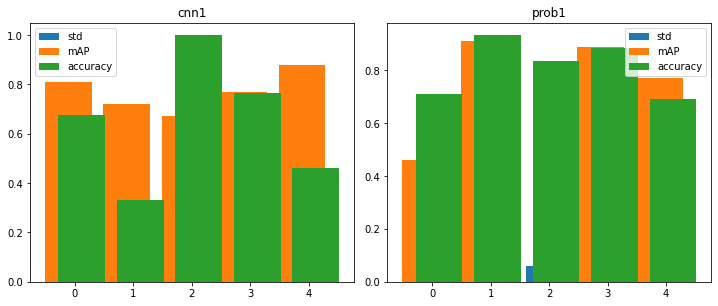

In [9]:
plot_stats([result1, result2], ["std", "mAP", "accuracy"], ["cnn1", "prob1"] )

0 2 0
1 2 0
2 2 0
3 2 0
4 2 0
0 2 2
1 2 2
2 2 2
3 2 2
4 2 2


<AxesSubplot:title={'center':'accuraccy'}>

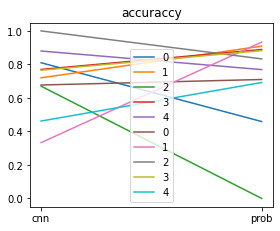

In [19]:
axis1 = plot_stats_by_type(np.array([result1, result2]), ['cnn', 'prob'], 0, 'mAP', clusters=range(5))

plot_stats_by_type(np.array([result1, result2]), ['cnn', 'prob'], 2, 'accuraccy', clusters=range(5), axis=axis1)